# Exploratory Data Analysis  on ‘Indian Premier League'

As a sports analysts to find out the most successful teams, players and factors contributing win or loss of a team.

Note: **The following dataset is upto the season 2019**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import functools
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

In [2]:
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objects as go

print(__version__) # requires version >= 1.9.0

5.1.0


In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
# For offline use
cf.go_offline()

In [6]:
import plotly.io as pio
pio.renderers.default = "notebook+pdf"

In [7]:
#loading  both the datasets
delivery=pd.read_csv('deliveries.csv')

matches_data=pd.read_csv('matches.csv')

In [8]:
## checking the number of rows and columns in the datasets

print('matches')
print(matches_data.shape,'\n')

print('delivery')
print(delivery.shape)

matches
(756, 18) 

delivery
(179078, 21)


In [9]:
##Printing a concise summary of the DataFrame.
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

    * Total 756 matches were played combining all the season
    * While most of the columns didnot have any null value expect city ,winner,player_of_match, umpire1,umpire2,umpire3
    * umpire3 has most number of missing values

In [10]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
matches_data[['win_by_runs','win_by_wickets']].describe().transpose()

count       mean        std  min  25%  50%   75%    max
win_by_runs     756.0  13.283069  23.471144  0.0  0.0  0.0  19.0  146.0
win_by_wickets  756.0   3.350529   3.387963  0.0  0.0  4.0   6.0   10.0

**From the table above we can say that**

    * The highest win margin by runs is 146.
    * 75% of the winning  team that batted first had a win margin of less than 19 runs and 25%  had more than 19 runs
    * The highest win margin by wickets is 10
    * 75% of the winning team that fielded first won by a margin of  less than 6 wickets and 25% more than 6 wickets

In [12]:
#checking the count of each null values in each column
missing_value=pd.DataFrame(matches_data.isnull().sum(),columns=['count'])
missing_value['percentage_count']=missing_value['count']/len(matches_data)
missing_value

count  percentage_count
id                   0          0.000000
season               0          0.000000
city                 7          0.009259
date                 0          0.000000
team1                0          0.000000
team2                0          0.000000
toss_winner          0          0.000000
toss_decision        0          0.000000
result               0          0.000000
dl_applied           0          0.000000
winner               4          0.005291
win_by_runs          0          0.000000
win_by_wickets       0          0.000000
player_of_match      4          0.005291
venue                0          0.000000
umpire1              2          0.002646
umpire2              2          0.002646
umpire3            637          0.842593

umpire3 has around 637 missing values ,which is around 84.2593% missing data .umpire3 is not a significant feature,Thus it is better to drop these columns.While the rest had less than 1% missing values .we will fill those missing values .

In [13]:
matches_data.drop(['umpire3'],axis=1,inplace=True)

In [14]:
matches_data[matches_data['city'].isna()]['venue']

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

All the missing cities have the same venue ,i.e Dubai International Cricket Stadium . We can clearly say that the Dubai is the name of the city for all the missing places.

In [15]:
#filling the missing values in city column
matches_data['city'].fillna('Dubai',inplace=True)

In [16]:
matches_data[matches_data.winner.isna()]

id  season       city        date                        team1  \
300    301    2011      Delhi  2011-05-21             Delhi Daredevils   
545    546    2015  Bangalore  2015-04-29  Royal Challengers Bangalore   
570    571    2015  Bangalore  2015-05-17             Delhi Daredevils   
744  11340    2019  Bengaluru    30/04/19  Royal Challengers Bangalore   

                           team2                  toss_winner toss_decision  \
300                Pune Warriors             Delhi Daredevils           bat   
545             Rajasthan Royals             Rajasthan Royals         field   
570  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
744             Rajasthan Royals             Rajasthan Royals         field   

        result  dl_applied winner  win_by_runs  win_by_wickets  \
300  no result           0    NaN            0               0   
545  no result           0    NaN            0               0   
570  no result           0    NaN            0               0   
744  no result           0    NaN            0               0   

    player_of_match                   venue          umpire1       umpire2  
300             NaN        Feroz Shah Kotla        SS Hazare     RJ Tucker  
545             NaN   M Chinnaswamy Stadium        JD Cloete     PG Pathak  
570             NaN   M Chinnaswamy Stadium  HDPK Dharmasena  K Srinivasan  
744             NaN  M. Chinnaswamy Stadium      Nigel Llong  Ulhas Gandhe

In [17]:
matches_data['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [18]:
matches_data['winner'].fillna('Points Shared',inplace=True)

In [19]:
x=delivery.dismissal_kind.value_counts().to_frame().reset_index()
x.columns=['dismissal_kind','Count']
x

dismissal_kind  Count
0                 caught   5348
1                 bowled   1581
2                run out    852
3                    lbw    540
4                stumped    278
5      caught and bowled    211
6           retired hurt     12
7             hit wicket     10
8  obstructing the field      2

For every penalty runs we are adding the penalty ball columns. 

In [20]:
delivery['wide_ball']=delivery['wide_runs'].apply(lambda x:1 if x!=0 else np.NaN)
delivery['no_ball']=delivery['noball_runs'].apply(lambda x:1 if x!=0 else np.NaN)
delivery[['wide_ball','no_ball','wide_runs','noball_runs']].head()

wide_ball  no_ball  wide_runs  noball_runs
0        NaN      NaN          0            0
1        NaN      NaN          0            0
2        NaN      NaN          0            0
3        NaN      NaN          0            0
4        1.0      NaN          2            0

In [21]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'wide_ball', 'no_ball'],
      dtype='object')

### Most games officiated by an Umpire

In [22]:
umpire_count=matches_data.umpire2.value_counts().to_frame()
umpire_count['umpire1']=matches_data.umpire1.value_counts()
umpire_count.replace(np.NAN,0 ,inplace=True)
umpire_count['matches_officiated']=umpire_count['umpire2']+umpire_count['umpire1']
umpire_count.drop(['umpire2','umpire1'],axis=1,inplace=True)
umpire_count.sort_values(by='matches_officiated',ascending=False,inplace=True)
umpire_count

matches_officiated
S Ravi                             106.0
HDPK Dharmasena                     87.0
C Shamshuddin                       73.0
AK Chaudhary                        58.0
SJA Taufel                          55.0
...                                  ...
KN Anantapadmanabhan                 3.0
Nanda Kishore                        3.0
SD Ranade                            2.0
Nand Kishore                         1.0
Subroto Das                          1.0

[65 rows x 1 columns]

* S Ravi has officiated in 106 matches which is the highest number of matches officiated by any umpire, followed by Dharmasena 87.
* Subroto Das and Nand Ksihore has least number of matches officiated,1 each.

### Games Played per Season 

In [23]:
x=pd.DataFrame(matches_data['season'].value_counts())
x = x.reset_index()
x.columns = ['Year', 'Matches Played']

#Plotting the total matches played per season
x.iplot(kind='bar',x='Year',title='Matches Played per Season',xTitle='Season',yTitle='Total Matches Played')

* Total of 76 matches were played in the 2013 season which  is the highest number of matches played for a season .
* In 2009 season 57 matches were played which is the minimum number of matches played in any season

### Games played per city

city  total_matches
0           Mumbai            101
1          Kolkata             77
2            Delhi             74
3        Bangalore             66
4        Hyderabad             64
5          Chennai             57
6           Jaipur             47
7       Chandigarh             46
8             Pune             38
9           Durban             15
10       Bengaluru             14
11   Visakhapatnam             13
12       Ahmedabad             12
13       Centurion             12
14          Rajkot             10
15          Mohali             10
16          Indore              9
17      Dharamsala              9
18    Johannesburg              8
19       Cape Town              7
20          Ranchi              7
21       Abu Dhabi              7
22         Cuttack              7
23           Dubai              7
24  Port Elizabeth              7
25         Sharjah              6
26          Raipur              6
27           Kochi              5
28          Kanpur              4
29          Nagpur              3
30       Kimberley              3
31     East London              3
32    Bloemfontein              2

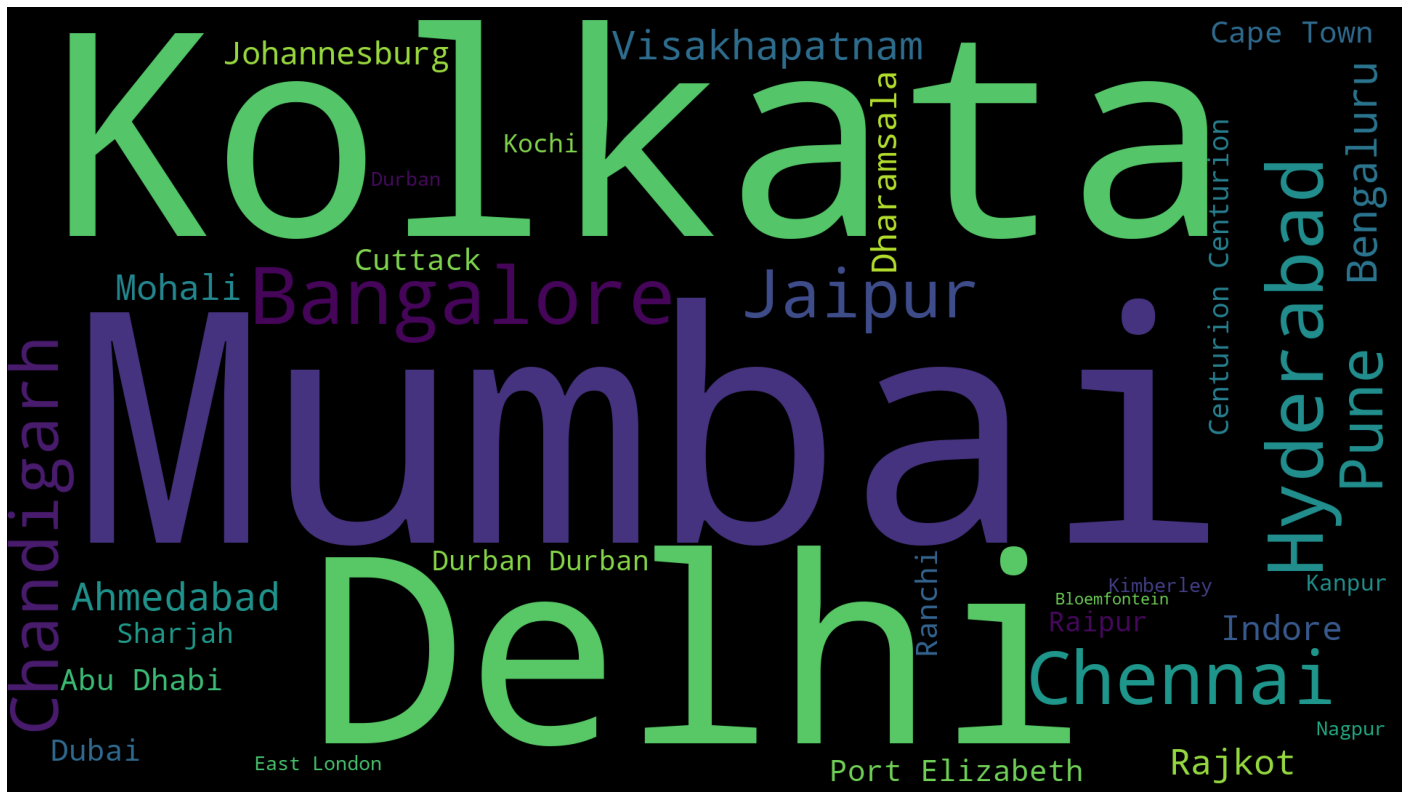

In [24]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(matches_data.city))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('city_graph.png')
city_=dict(matches_data['city'].value_counts())
citi=pd.DataFrame(list(city_.items()),columns=['city','total_matches'])
citi

* Mumbai holds the highest number 101 to host matches,followed by Kolkata 77 and Delhi 74.
* Bloemfontein host least number of matches,i.e 2 , follwoed by Kimberley 3,Nagpur 3 and East London 3


### Games played per Venue

Venue  Total_matches
0                                        Eden Gardens             77
1                               M Chinnaswamy Stadium             73
2                                    Wankhede Stadium             73
3                                    Feroz Shah Kotla             67
4           Rajiv Gandhi International Stadium, Uppal             56
5                     MA Chidambaram Stadium, Chepauk             49
6                              Sawai Mansingh Stadium             47
7          Punjab Cricket Association Stadium, Mohali             35
8             Maharashtra Cricket Association Stadium             21
9                          Subrata Roy Sahara Stadium             17
10                         Dr DY Patil Sports Academy             17
11                                          Kingsmead             15
12  Punjab Cricket Association IS Bindra Stadium, ...             14
13                                    SuperSport Park             12
14                       Sardar Patel Stadium, Motera             12
15  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...             11
16                                  Brabourne Stadium             11
17             Saurashtra Cricket Association Stadium             10
18                             Holkar Cricket Stadium              9
19       Himachal Pradesh Cricket Association Stadium              9
20                 Rajiv Gandhi Intl. Cricket Stadium              8
21                          M. A. Chidambaram Stadium              8
22                              New Wanderers Stadium              8
23                            Feroz Shah Kotla Ground              7
24                                   Barabati Stadium              7
25                             M. Chinnaswamy Stadium              7
26                                   St George's Park              7
27                                           Newlands              7
28                 JSCA International Stadium Complex              7
29                               Sheikh Zayed Stadium              7
30                Dubai International Cricket Stadium              7
31                                  IS Bindra Stadium              7
32   Shaheed Veer Narayan Singh International Stadium              6
33                            Sharjah Cricket Stadium              6
34                                      Nehru Stadium              5
35                                         Green Park              4
36                              De Beers Diamond Oval              3
37       Vidarbha Cricket Association Stadium, Jamtha              3
38                                       Buffalo Park              3
39                                    OUTsurance Oval              2
40                                   ACA-VDCA Stadium              2

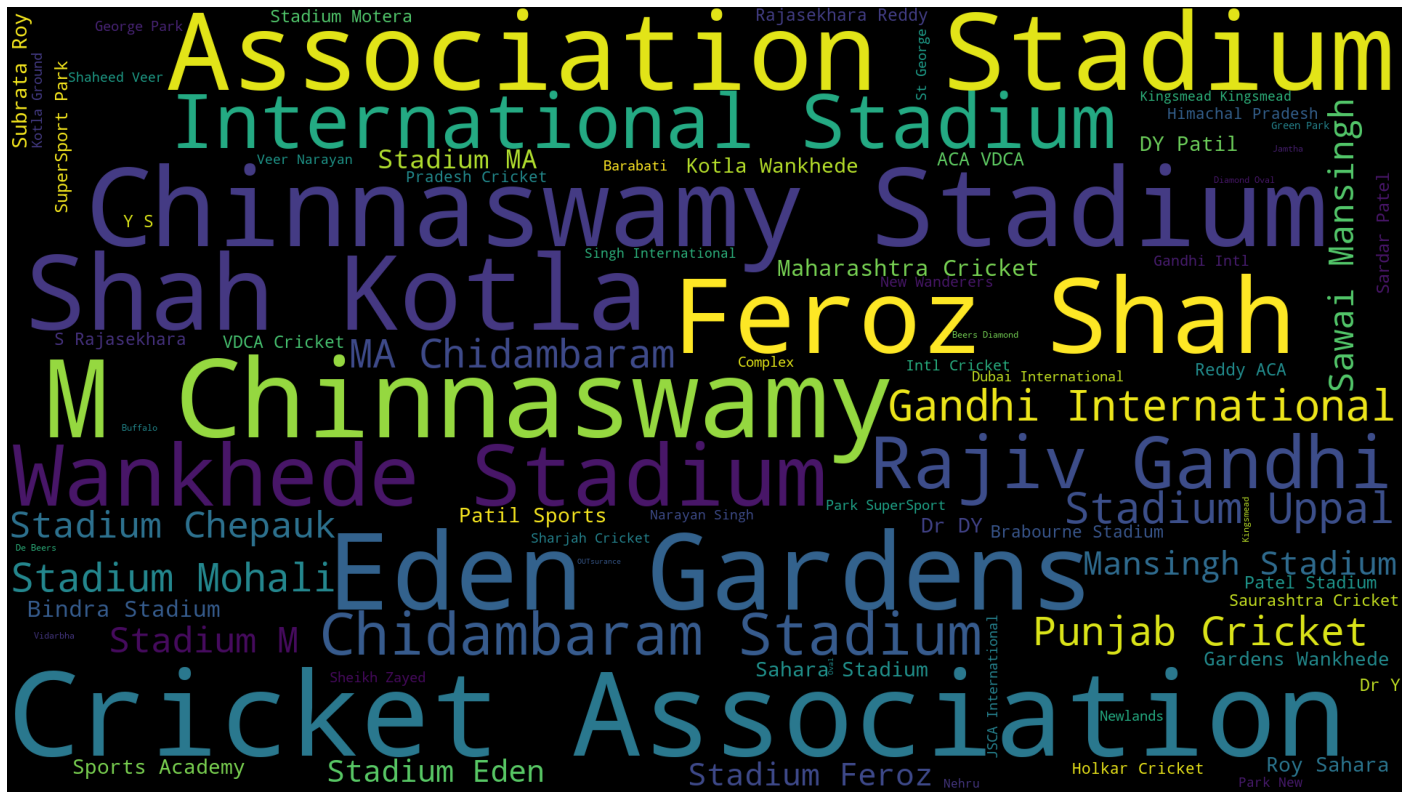

In [25]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(matches_data.venue))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('venue_graph.png')
venue_=dict(matches_data['venue'].value_counts())
venues=pd.DataFrame(list(venue_.items()),columns=['Venue','Total_matches'])
venues

* A total of 40 stadiums were used from 2008-2019.
* Eden Garden hosted 77 matches which is the highest number of matches hosted by any stadium followed by Wankhede Stadium 73,M Chinnaswamy Stadium 73 ,Feroz Shah Kotla 67, Rajiv Gandhi International Stadium, Uppal 56.

* ACA-VDCA Stadium hosted 2 matches which is the least number of matches played.

In [26]:
matches_data['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [27]:
matches_data['team2'].value_counts()

Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

In [28]:
matches_data['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Points Shared                    4
Name: winner, dtype: int64

Here we can clearly see from that in the team1,team2 and winner columns there are two separate entry for Rising Pune Supergiant,One is Rising Pune Supergiant and the other is Rising Pune Supergiants. So we will replace Rising Pune Supergiants with Rising Pune Supergiant.

In [29]:
cols=['team1','team2','winner']
matches_data[(matches_data['team1']=='Rising Pune Supergiants')|(matches_data.team2=='Rising Pune Supergiants')|(matches_data.winner=='Rising Pune Supergiants')][cols]

team1                        team2  \
576               Mumbai Indians      Rising Pune Supergiants   
581      Rising Pune Supergiants                Gujarat Lions   
585      Rising Pune Supergiants              Kings XI Punjab   
591  Royal Challengers Bangalore      Rising Pune Supergiants   
595      Rising Pune Supergiants        Kolkata Knight Riders   
597          Sunrisers Hyderabad      Rising Pune Supergiants   
600      Rising Pune Supergiants                Gujarat Lions   
604      Rising Pune Supergiants               Mumbai Indians   
608             Delhi Daredevils      Rising Pune Supergiants   
610      Rising Pune Supergiants  Royal Challengers Bangalore   
615          Sunrisers Hyderabad      Rising Pune Supergiants   
620      Rising Pune Supergiants        Kolkata Knight Riders   
624             Delhi Daredevils      Rising Pune Supergiants   
628              Kings XI Punjab      Rising Pune Supergiants   

                          winner  
576      Rising Pune Supergiants  
581                Gujarat Lions  
585              Kings XI Punjab  
591  Royal Challengers Bangalore  
595        Kolkata Knight Riders  
597      Rising Pune Supergiants  
600                Gujarat Lions  
604               Mumbai Indians  
608      Rising Pune Supergiants  
610  Royal Challengers Bangalore  
615          Sunrisers Hyderabad  
620        Kolkata Knight Riders  
624      Rising Pune Supergiants  
628      Rising Pune Supergiants

In [30]:
matches_data.replace(['Rising Pune Supergiants'],'Rising Pune Supergiant',inplace=True)

Delhi Daredevils and Delhi Capitals are the same team .They just changed their name into Delhi Capitals

In [31]:
matches_data.replace(['Delhi Daredevils'],'Delhi Capitals',inplace=True)
delivery.replace(['Rising Pune Supergiants'],'Rising Pune Supergiant',inplace=True)
delivery.replace(['Delhi Daredevils'],'Delhi Capitals',inplace=True)

### Most Succesfull Team

In [32]:
games_played=matches_data['team1'].value_counts().to_frame()
games_played['team2']=matches_data['team2'].value_counts()
games_played['total_games']=games_played['team1']+games_played['team2']
games_played['win']=matches_data.winner.value_counts()
games_played['winning_percentage']=games_played['win']/games_played['total_games']*100
games_played.drop(['team1','team2'],axis=1,inplace=True)

games_played.iplot(kind='bar',title='Comparision Chart for various teams based on Total games played and Total games Won',
                   xTitle='Teams',yTitle='Count')
games_played

total_games  win  winning_percentage
Mumbai Indians                       187  109           58.288770
Kings XI Punjab                      176   82           46.590909
Chennai Super Kings                  164  100           60.975610
Royal Challengers Bangalore          180   84           46.666667
Kolkata Knight Riders                178   92           51.685393
Delhi Capitals                       177   77           43.502825
Rajasthan Royals                     147   75           51.020408
Sunrisers Hyderabad                  108   58           53.703704
Deccan Chargers                       75   29           38.666667
Pune Warriors                         46   12           26.086957
Rising Pune Supergiant                30   15           50.000000
Gujarat Lions                         30   13           43.333333
Kochi Tuskers Kerala                  14    6           42.857143

*  Most matches were played by Mumbai Indians followed by Royal challengers Banglore,Kolkata Knight Riders,Kings XI Punjab,While least number of matches were played by Kochi Tuskers Kerala, followed by Delhi Capitals.Rising Pune Supergiant and  Gujarat Lions played 30 match each.

* Most number of win is 109 for Mumbai Indians followed by Chennai Super Kings 100  and on third is Kolkata Knight Riders with 92 wins .While mere 6 wins Kochi Tuskers Kerala has the least number of wins but they played only 1 season.

* In terms of winning percentage Delhi capitals led with a winning percent of 62.5% ,they too had played only 1 season, In second place with 60.97% is chennai Super Kings, and on third is Mumbai Indians with a winning percentage of 58.28%.


### Most wins per Season

In [33]:
wins_perseason=matches_data.groupby(['season'])['winner'].value_counts()
wins_perseason

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        Points Shared                   1
Name: winner, Length: 103, dtype: int64

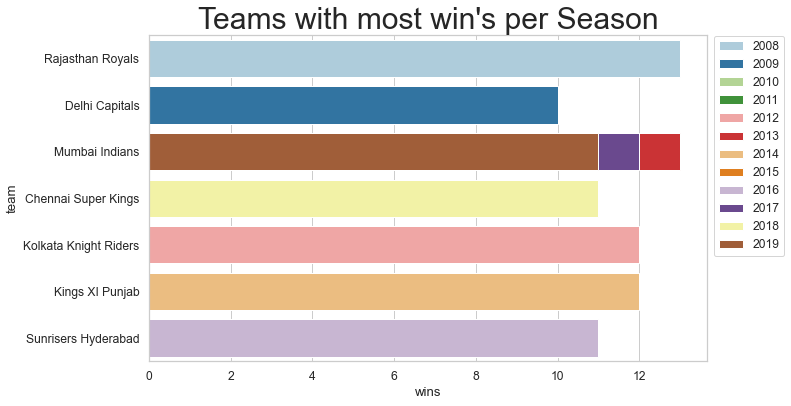

In [34]:
year = 2008
mostwins_per_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in wins_perseason.iteritems():    
    if items[0][0]==year:
        wins = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]})
        mostwins_per_season = mostwins_per_season.append(wins)
        year += 1

mostwins_per_season=mostwins_per_season.reset_index(drop=1)

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1.1)
sns.set_style('whitegrid')
sns.set_palette("Paired")
sns.barplot(x='wins',y='team',data=mostwins_per_season,hue='year',dodge=False)
plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.66))
plt.title("Teams with most win's per Season",fontsize=30)
plt.show()

* Most number of match won by any team in a particular season is 13. Rajasthan Royals and Mumbain Indian has achieved these feat in the season 2008  and 2013 respectively.

* Mumbai Indians has most number of wins in 4 seasons(2010, 2013, 2017, and 2019)

### Bowler Statistics

In [35]:
columns=['match_id','ball','no_ball','wide_ball','total_runs','extra_runs','dismissal_kind']

#esxcluding super_over data
match=delivery[delivery.is_super_over==0]

#creatiing an entry dataframe
a=pd.DataFrame(columns=['bowler'])

for cols in columns[:4]:
    if cols=='match_id':
        
        #counting the matches played
        df1=match.groupby('bowler')[cols].nunique().to_frame().reset_index()
        df1.columns=['bowler','Matches_Played']
    else:
        
        #counting the ball ,no_ball and wide_ball bowled
        df1=match.groupby('bowler')[cols].count().to_frame().reset_index()
    a=pd.merge(a,df1,how='outer',on='bowler')
    
for col in columns[4:]:
    if col=='dismissal_kind':
        match=match[(match[col]!='run out')&(match[col]!='obstructing the field')&(match[col]!='retired hurt')]
        
        y=match.groupby(['bowler','match_id'])[col].count().to_frame().reset_index()
        y.columns=['bowler','match_id','wickets_taken']
        #y['3w']=y['wickets_taken'].apply(lambda x:1 if (x==3) else 0 )
        y['4w']=y['wickets_taken'].apply(lambda x:1 if (x==4) else 0 )
        y['5w']=y['wickets_taken'].apply(lambda x:1 if (x==5) else 0 )
        y_stats=y.groupby('bowler')['wickets_taken','4w','5w'].sum().reset_index()
        
        #max wickets taken in a match
        z=match.groupby(['bowler','match_id'])[col].count().to_frame().reset_index()
        z.columns=['bowler','match_id','wickets_taken']
        d=z.groupby('bowler')['wickets_taken'].max().to_frame().reset_index()
        z=pd.merge(z,d,how='inner',on=['bowler','wickets_taken'])
        
        #runs conceded when max wickets_taken
        r=match.groupby(['bowler','match_id'])['total_runs'].sum().to_frame().reset_index()
        r.columns=['bowler','match_id','runs']
        z=pd.merge(z,r,how='inner',on=['bowler','match_id'])
        z.columns=['bowler','match_id','wickets','runs']
        z['best_figures']=z['wickets'].astype('str')+'/'+z['runs'].astype('str')
        
        
        df2=pd.merge(y_stats,z,how='outer',on='bowler')
        
        
        
    elif col=='total_runs':
        #maidenovers_bowled
        maiden=match.groupby(['bowler','match_id','over'])[col].sum().to_frame().reset_index()
        maiden_overs=maiden[maiden[col]==0].groupby('bowler')['over'].count().to_frame().reset_index()
        maiden_overs.columns=['bowler','maiden_overs']
        
        #total_runs conceded
        total_runs=match.groupby('bowler')[col].sum().to_frame().reset_index()
        
        #merging the two dataframe
        df2=pd.merge(maiden_overs,total_runs,how='outer',on='bowler')
        
    else:
        df2=match.groupby('bowler')[col].sum().to_frame().reset_index()
    a=pd.merge(a,df2,how='outer',on='bowler')
    
    

a
a=a.assign(Overs_bowled=lambda a:round((a['ball']-a['no_ball']-a['wide_ball'])/6))
a=a.assign(Economy =lambda a:round((a['total_runs']/a['Overs_bowled']),2))
a=a.assign(Average=lambda a:round((a['total_runs']/a['wickets_taken']),2))
a=a.assign(Strike_Rate=lambda a:round((a['ball']/a['wickets_taken']),2))
a.replace(np.inf,'0',inplace=True)
a.sort_values('wickets_taken',ascending=False)
#a.drop(match_id)
a.drop_duplicates(subset='bowler',keep='first',inplace=True)
a=a.astype({'Economy':float,'Average':float,'Strike_Rate':float})
a

bowler  Matches_Played  ball  no_ball  wide_ball  maiden_overs  \
0    A Ashish Reddy              20   270        2          6           NaN   
1        A Chandila              12   234        0          0           NaN   
2       A Choudhary               5   108        1          6           2.0   
3       A Dananjaya               1    25        0          1           NaN   
4        A Flintoff               3    66        0          0           NaN   
..              ...             ...   ...      ...        ...           ...   
679      YA Abdulla              11   222        1         12           1.0   
681       YK Pathan              82  1184        0         37           1.0   
684       YS Chahal              83  1841        6         47           3.0   
686    Yuvraj Singh              73   882        1         12           NaN   
688          Z Khan              99  2276        2         74           5.0   

     total_runs  extra_runs  wickets_taken  4w  5w  match_id  wickets  runs  \
0           400          14             18   0   0       376        3    25   
1           245           3             11   1   0       365        4    13   
2           144           7              5   0   0        42        2    17   
3            48           1              0   0   0      7902        0    48   
4           106           1              2   0   0       118        1    45   
..          ...         ...            ...  ..  ..       ...      ...   ...   
679         311          17             15   2   0       127        4    31   
681        1443          71             42   0   0       117        3    22   
684        2416         116            100   2   0       626        4    25   
686        1092          27             36   2   0       250        4    29   
688        2860         169            102   1   0       452        4    17   

    best_figures  Overs_bowled  Economy  Average  Strike_Rate  
0           3/25          44.0     9.09    22.22        15.00  
1           4/13          39.0     6.28    22.27        21.27  
2           2/17          17.0     8.47    28.80        21.60  
3           0/48           4.0    12.00     0.00         0.00  
4           1/45          11.0     9.64    53.00        33.00  
..           ...           ...      ...      ...          ...  
679         4/31          35.0     8.89    20.73        14.80  
681         3/22         191.0     7.55    34.36        28.19  
684         4/25         298.0     8.11    24.16        18.41  
686         4/29         145.0     7.53    30.33        24.50  
688         4/17         367.0     7.79    28.04        22.31  

[405 rows x 19 columns]

### Highest Wicketakers in IPL history

In [36]:
a.nlargest(20,['wickets_taken']).iplot(kind='bar',x=['bowler'],y=['Matches_Played','wickets_taken'],xTitle='Player',
                                       yTitle='Stats',theme='solar',
                                            color=['Red','Yellow'],title='Top 20 Highest Wickettakers')

* S Malinga has highest wickets to his name.He has taken 170 wickets in 122 matches
* A Mishra is the second highets wicketakers with 156 wickets in 147 games.
* In 3rd H Singh has 150 wickets in his name in 157 games.

### Most economy bowler
Considering only those bowlers who has played atleast 20 games and 20 overs.

In [37]:
econ_bowler=a[(a['Matches_Played']>=20)&(a['Overs_bowled']>=20)]

econ_bowler.nsmallest(10,['Economy']).iplot(kind='scatter',x=['Overs_bowled','bowler'],y=['Economy'],xTitle='Player and Matches',
                                       yTitle='Economy',color=['Blue'],title='Top 10 Most  Economy Bowlers')

* A kumble is the most economy bowler with a economy rate of 6.76 
* S Narine has the second lowest economy with 6.87
* In 3rd its D Vettori with 6.88 economy rate

The top 5 economy bowlers are the Spinners.

D Steyn is the only fast bowler who is in the top 10 of lowest economy bowler with a economy rate of 6.95

### Bowler with Best Bowling Average
* The average number of runs conceded per wicket. (Ave = Runs/W)

Considering only those bowlers who has played atleast 14 games and 20 overs.

In [38]:
aveg_bowler=a[(a['Matches_Played']>=14)&(a['Overs_bowled']>=20)]
#c=a[a.Average!=0]
aveg_bowler.nsmallest(10,['Average']).iplot(kind='scatter',x=['bowler'],y=['Average'],xTitle='Player',
                                       yTitle='Average',color=['Green'],title='Top 10 Bowlers with best Average')

* BJ Hodge and  has the best bowling average of 18.24
* K Rabada has the second best average of 19.32
* D Bollinger has the third best bowling average of 19.35

### Bowler with Best Bowling Strike Rate

* The average number of balls bowled per wicket taken. (SR = Balls/W)

Considering only those bowlers who has played atleast 14 games and 20 overs.

In [39]:
sr_bowler=a[(a['Matches_Played']>=14)&(a['Overs_bowled']>=20)]
#c=a[a.Average!=0]
sr_bowler.nsmallest(10,['Strike_Rate']).iplot(kind='scatter',x=['bowler'],y=['Strike_Rate'],xTitle='Player',
                                       yTitle='Strike Rate',color=['Purple'],title='Top 10 Bowlers with best Strike Rate')

* BJ Hodge and K Rabada has the best Strike Rate of 14.
* A Reddy has the second best of 15.
* S Gopal has the third best of 15.61.

### Bowlers with most Maiden Overs bowled

In [40]:
X=a.nlargest(10,'maiden_overs')
Y=X['bowler']
Z=X['maiden_overs']

fig = go.Figure(data=go.Scatter(x=Y, y=Z,text='maiden',line=dict(color='firebrick', width=4)))
fig.update_layout(title='Top 10 Bowlers with most Maiden Overs',xaxis_title='Bowler',yaxis_title='Overs')
fig.show()

### Bowlers with most number of Extra balls and Extra Runs conceeded

In [41]:
#extracting the 10 bowlers with most number of no ball bowled
nball=a.nlargest(10,['no_ball'])[['bowler','no_ball','wide_ball','extra_runs']]

#extracting the 10 bowlers with most number of wide balls bowled
wball=a.nlargest(10,['wide_ball'])[['bowler','wide_ball','no_ball','extra_runs']]

#merging both the datas to get the list of bowler with most number of wide balls and no balls bowled
extra_balls=pd.merge(nball,wball,how='outer',on=['bowler','wide_ball','no_ball','extra_runs'],)
extra_balls.sort_values(by='extra_runs',ascending=False,inplace=True)

In [42]:
bowler=extra_balls['bowler']
noball=extra_balls['no_ball']
wideball=extra_balls['wide_ball']
extra=extra_balls['extra_runs']

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=bowler, y=noball, name='NO BALL',
                         line=dict(color='darkcyan', width=4)))
fig.add_trace(go.Scatter(x=bowler, y=wideball, name = 'WIDE BALL',
                         line=dict(color='peru', width=4)))
fig.add_trace(go.Scatter(x=bowler, y=extra, name='EXTRA RUNS',
                         line=dict(color='darkred', width=4,
                              )
))

# Edit the layout
fig.update_layout(title='Bowler with most extra delivery and extra runs conceeded',
                   xaxis_title='Player',
                   yaxis_title='NO BALL,WIDE BALL,EXTRA RUNS')


fig.show()

### Players with 5 wickets in a innings

In [43]:
a[a['5w']!=0].iplot(kind='bar',x=['bowler'],y=['5w'],xTitle='Player',yTitle='Number of 5 wickets takens in a Innings in career'
                    ,color=['gold'],title='Players with 5 wickets in a Innings' )

* There are 15 players with 5 wickets haul to their name.
* J Unadkat and J Faulkner are the only players with 2 five wickets haul to their names.

### Players with 4 wickets in a Innings

In [44]:
a[a['4w']!=0].iplot(kind='bar',x=['bowler'],y=['4w'],bins=100,xTitle='Player',yTitle='Number of 4 wickets takens in a Innings in career',
                    theme='solar',color='orange',title='Players with 4 wickets in a Innings ')

In [45]:
#extracting all the bowlers in the IPL
col='dismissal_kind'
new_data=delivery[(delivery[col]!='run out')&(delivery[col]!='obstructing the field')&(delivery[col]!='retired hurt')&(delivery['is_super_over']==0)]
bowler_list=set(new_data.bowler.unique())

### Players with Hatricks

In [46]:
h_dict={}
for bowler in bowler_list:
    y=new_data[(new_data.bowler==bowler)]
    x=y.groupby('match_id')['dismissal_kind'].count().reset_index()
    x=x[x['dismissal_kind']>=3]
    id_list=x.match_id.tolist()
    id_list
    
    
    
    for c in id_list:
        new=new_data[(new_data.match_id==c)&(new_data.bowler==bowler)]
        new.reset_index(inplace=True,drop=True)
        i=0
    
        while i<len(new)-2:
            if new.iloc[i:i+3]['player_dismissed'].notna().all():
                if bowler in h_dict:
                    h_dict[bowler]+=1
                else:
                    h_dict[bowler]=1
                i+=4
            else:
                i+=1
            
h_dict
hatricks=pd.DataFrame(h_dict.keys(),columns=['Player'])
hatricks['Hatricks']=h_dict.values()
hatricks.iplot(kind='bar',x='Player',y='Hatricks',color='indigo',yTitle='Number of Hatricks',
               xTitle='Player',title="Players with most Hatricks")

Among all the hatrick takers:

* A Mishra has 3 hatricks which is the highets by any players
    
* Yuvraj Singh has 2 hatricks to his name
    
* Rest all the hatrick takers has 1 each

#### Effective bowler at the death over

In [47]:
columns=['match_id','ball','no_ball','wide_ball','total_runs','extra_runs','dismissal_kind']

#consider only the death overs.
death=delivery[delivery.over>15]
x=pd.DataFrame(columns=['bowler'])
for col in columns[:4]:
    if col=='match_id':
        df1=death.groupby('bowler')[col].nunique().to_frame().reset_index()
        df1.columns=['bowler','Matches_Played']
    else:
        df1=death.groupby('bowler')[col].count().to_frame().reset_index()
    x=pd.merge(x,df1,how='outer',on='bowler')

for cols in columns[4:]:
    if cols=='dismissal_kind':
        df2=death[(death[cols]!='run_out')&(death[cols]!='obstructing the field')&
              (death[cols]!='retired hurt')].groupby('bowler')[cols].count().to_frame().reset_index()
        df2.columns=['bowler','wickets_taken']
        
        
    elif cols=='total_runs':
        #maiden over
        maiden=death.groupby(['bowler','match_id','over'])['total_runs'].sum().to_frame().reset_index()
        maiden_overs=maiden[maiden[cols]==0].groupby('bowler')['over'].count().to_frame().reset_index()
        maiden_overs.columns=['bowler','maiden_overs']
        
        #total_runs conceded
        total_runs=death.groupby('bowler')[cols].sum().to_frame().reset_index()
        
        #merging the two dataframe
        df2=pd.merge(maiden_overs,total_runs,how='outer',on='bowler')
        
            
    else:
        df2=death.groupby('bowler')[cols].sum().to_frame().reset_index()
    
    x=pd.merge(x,df2,how='outer',on='bowler')
    
x=x.assign(Overs_bowled=lambda x:round((x['ball']-x['no_ball']-x['wide_ball'])/6))
x=x.assign(Economy =lambda x:round((x['total_runs']/x['Overs_bowled']),2))
x=x.assign(Average=lambda x:round((x['total_runs']/x['wickets_taken']),2))
x=x.assign(Strike_Rate=lambda x:round((x['ball']/x['wickets_taken']),2))
x.replace(np.inf,0,inplace=True)
x.sort_values(by=['wickets_taken','total_runs'],inplace=True,ascending =False,ignore_index=True)
x=x.astype({'Economy':float,'Average':float,'Strike_Rate':float})
x

bowler  Matches_Played  ball  no_ball  wide_ball  maiden_overs  \
0         SL Malinga             114  1174        8         49           2.0   
1           DJ Bravo             105  1178        4         53           4.0   
2            B Kumar              97   963        5         33           1.0   
3          SP Narine              93   808        2         13           2.0   
4            A Nehra              64   546        5         14           NaN   
..               ...             ...   ...      ...        ...           ...   
338           S Dube               1     5        0          1           NaN   
339  AA Jhunjhunwala               1     1        0          0           NaN   
340           S Rana               1     4        0          0           NaN   
341     S Rutherford               1     5        0          0           NaN   
342          JM Kemp               1     1        0          0           NaN   

     total_runs  extra_runs  wickets_taken  Overs_bowled  Economy  Average  \
0          1540         128            122         186.0     8.28    12.62   
1          1819          93            102         187.0     9.73    17.83   
2          1415          80             80         154.0     9.19    17.69   
3          1025          41             65         132.0     7.77    15.77   
4           794          36             63          88.0     9.02    12.60   
..          ...         ...            ...           ...      ...      ...   
338           4           1              0           1.0     4.00     0.00   
339           2           0              0           0.0     0.00     0.00   
340           2           0              0           1.0     2.00     0.00   
341           2           0              0           1.0     2.00     0.00   
342           1           0              0           0.0     0.00     0.00   

     Strike_Rate  
0           9.62  
1          11.55  
2          12.04  
3          12.43  
4           8.67  
..           ...  
338         0.00  
339         0.00  
340         0.00  
341         0.00  
342         0.00  

[343 rows x 13 columns]

### Bowlers with most wickets in Death Overs


In [48]:
x.nlargest(20,['wickets_taken']).iplot(kind='bar',x=['bowler','Overs_bowled'],y=['wickets_taken'],xTitle=
                                      'Bowler and Overs Bowled',yTitle='Wickets Taken',title=
                                      'Top 20 bowlers with most wickets taken at Depth Overs',color='palegreen')

### Top 10  Most Economical Bowlers at the Depth Overs

In [49]:
x[x.Overs_bowled>=8].nsmallest(20,['Economy']).iplot(kind='line',x=['bowler','Overs_bowled'],y=['Economy'],xTitle=
                                      'Bowler and Overs Bowled',yTitle='Wickets Taken',title=
                                      'Top 10 Most Economical Bowlers at Depth Overs',color='yellowgreen')

### Bowlers with best Bowling Average at the death overs

In [50]:
avg_depth=x[(x['Average']!=0)&(x['Overs_bowled']>=8)]
#c=a[a.Average!=0]
avg_depth.nsmallest(10,'Average').iplot(kind='scatter',x=['bowler','wickets_taken'],y=['Average'],xTitle='Player',
                                       yTitle='Average',color=['Green'],title='Top 10 Bowlers with best Average')

### Bowlers with best Strike rate at the death overs

In [51]:
avg_sr=x[(x['Strike_Rate']!=0)&(x['Overs_bowled']>=8)]
#c=a[a.Average!=0]
avg_sr.nsmallest(10,'Strike_Rate').iplot(kind='scatter',x=['bowler','wickets_taken'],y=['Strike_Rate'],xTitle='Player',
                                       yTitle='Strike_Rate',color=['sienna'],title='Top 10 Bowlers with best Average')

### WicketKeepers with most number of Dismissals

In [52]:
wk_data=delivery[delivery.is_super_over==0]
stumps=wk_data[wk_data.dismissal_kind=='stumped']['fielder'].value_counts().to_frame().reset_index()
stumps.columns=['wicketkeeper','Stumpings']
caughts=wk_data[wk_data.dismissal_kind=='caught']['fielder'].value_counts().to_frame().reset_index()
caughts.columns=['wicketkeeper','Caught']
wk_stats=pd.merge(stumps,caughts,how='inner',on='wicketkeeper')
wk_stats['Total_dismissals']=wk_stats['Stumpings']+wk_stats['Caught']
wk_stats.sort_values(['Total_dismissals'],inplace=True,ascending=False,ignore_index=True)
wk_stats


#Top 10 wicketkeepers with most dismissals
best_wk=wk_stats.nlargest(n=10,columns=['Total_dismissals'])
best_wk.iplot(kind='bar',x=['wicketkeeper'],y=['Stumpings','Caught'],xTitle='Wicketkeeper',yTitle='Dismissals',
              title='Top 10 Wicketkeepers with most dismissals',color=['blue','aqua'])

### Most Runs by Batsman

In [53]:
rg=delivery[delivery.is_super_over==0]
#most runs scored

matches=rg.groupby('batsman')['match_id'].nunique().to_frame().reset_index()
matches.columns=['Player','Matches']


run=rg.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False).to_frame().reset_index()
run.columns=['Player','Runs']

df0=pd.merge(matches,run,on='Player',how='inner')


h_score=rg.groupby(['match_id','batsman'])['batsman_runs'].sum().sort_values(ascending=False).to_frame().reset_index()
#highest individual scores
high_iscore=h_score.groupby('batsman')['batsman_runs'].max().to_frame().reset_index()

high_iscore.columns=['Player','Highest Score']

df1=pd.merge(df0,high_iscore,how='inner',on='Player')

#counting the number of 50s and 100s scored
h_score['50s']=h_score['batsman_runs'].apply(lambda x:1 if (x>=50)&(x<100) else 0 )
h_score['100s']=h_score['batsman_runs'].apply(lambda x:1 if (x>=100)&(x<200) else 0 )
df2=h_score.groupby('batsman')['50s','100s'].sum().reset_index()
df2.columns=['Player','50s','100s']

df3=pd.merge(df1,df2,how='inner',on='Player')


#balls faced and strike rate
ball_faced=rg.groupby('batsman')['ball'].count().to_frame().reset_index()
ball_faced.columns=['Player','Balls faced']
df4=pd.merge(df3,ball_faced,how='inner',on='Player')
df4['Strike Rate']=df4['Runs']/df4['Balls faced']*100

df4

#dropping the players with 0 runs
drop_loc=np.where(df4.Runs==0)
df4.drop(df4.index[drop_loc],inplace=True)
df4


fours=rg[rg.batsman_runs==4].groupby(['batsman'])['batsman_runs'].agg(['count','sum']).reset_index()
fours.columns=['Player',"4's",'Runs_4']
sixs=rg[rg.batsman_runs==6].groupby(['batsman'])['batsman_runs'].agg(['count','sum']).reset_index()
sixs.columns=['Player',"6's",'Runs_6']

df5=pd.merge(fours,sixs,how='outer',on='Player')
df5.fillna(0,inplace=True)

df5['Runs_in_boundary']=df5['Runs_4']+df5['Runs_6']
df5.sort_values('Runs_in_boundary',ascending=False)

df6=pd.merge(df4,df5,how='inner',on='Player')
df6.sort_values('Runs',ascending=False,inplace=True)

df6

Player  Matches  Runs  Highest Score  50s  100s  Balls faced  \
401        V Kohli      169  5429            113   37     5         4209   
353       SK Raina      189  5407            100   38     1         4041   
305      RG Sharma      182  4914            109   36     1         3816   
93       DA Warner      126  4741            126   44     4         3397   
327       S Dhawan      158  4632             98   37     0         3776   
..             ...      ...   ...            ...  ...   ...          ...   
381  Shivam Sharma        2     5              4    0     0            3   
53      Avesh Khan        1     4              4    0     0            3   
406      VRV Singh        2     4              4    0     0            3   
127     GD McGrath        2     4              4    0     0            5   
317       RS Sodhi        1     4              4    0     0            2   

     Strike Rate    4's  Runs_4    6's  Runs_6  Runs_in_boundary  
401   128.985507  481.0  1924.0  191.0  1146.0            3070.0  
353   133.803514  495.0  1980.0  194.0  1164.0            3144.0  
305   128.773585  431.0  1724.0  194.0  1164.0            2888.0  
93    139.564321  459.0  1836.0  181.0  1086.0            2922.0  
327   122.669492  526.0  2104.0   96.0   576.0            2680.0  
..           ...    ...     ...    ...     ...               ...  
381   166.666667    1.0     4.0    0.0     0.0               4.0  
53    133.333333    1.0     4.0    0.0     0.0               4.0  
406   133.333333    1.0     4.0    0.0     0.0               4.0  
127    80.000000    1.0     4.0    0.0     0.0               4.0  
317   200.000000    1.0     4.0    0.0     0.0               4.0  

[424 rows x 13 columns]

### Fastest centuries in IPL

In [54]:
rg.replace(np.NaN ,0,inplace=True)

Runs=rg.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()
Balls=rg.groupby(['match_id','batsman'])['ball'].count().reset_index()
wide_balls=rg.groupby(['match_id','batsman'])['wide_ball'].sum().reset_index()
Balls['ball']=Balls['ball']-wide_balls['wide_ball']
hund_Runs=pd.merge(Runs,Balls,how='inner',on=['match_id','batsman'])
hund_Runs.columns=['match_id','Player','Runs','Balls']


z=rg[['match_id','batting_team','ball','bowling_team','wide_ball','no_ball','batsman','bowler','batsman_runs']].copy()


z['csum_run']=z.groupby(['match_id','batsman'])['batsman_runs'].cumsum()
z['ccount_ball']=z.groupby(['match_id','batsman'])['ball'].cumcount()
z['cwide_ball']=z.groupby(['match_id','batsman'])['wide_ball'].cumsum()

In [55]:
century=z[(z['csum_run']>99)&(z['csum_run']<=105)][['match_id','ball','batting_team','batsman','bowling_team',
                                              'csum_run','cwide_ball','ccount_ball']]
century.drop_duplicates('match_id',inplace=True)
century.sort_values('ccount_ball',ascending=True,inplace=True)

century['ccount_ball']=century['ccount_ball']-century['cwide_ball']+1

In [56]:
century.drop_duplicates('batsman',inplace=True)
century.drop(['cwide_ball','ball','csum_run'],axis=1,inplace=True)

In [57]:
century.columns=['match_id','Team','Player','Opposition','Balls for century']
century=century.merge(hund_Runs,how='inner',on=['match_id','Player'])

In [58]:
century.nsmallest(5,'Balls for century')

match_id                         Team        Player  \
0       411  Royal Challengers Bangalore      CH Gayle   
2       176             Rajasthan Royals     YK Pathan   
1       448              Kings XI Punjab     DA Miller   
3        72              Deccan Chargers  AC Gilchrist   
4        36          Sunrisers Hyderabad     DA Warner   

                    Opposition  Balls for century  Runs  Balls  
0                Pune Warriors               30.0   175   66.0  
2               Mumbai Indians               37.0   100   37.0  
1  Royal Challengers Bangalore               38.0   101   38.0  
3               Mumbai Indians               42.0   109   47.0  
4        Kolkata Knight Riders               43.0   126   59.0

### Fastest Fifties in IPL

There is a error in match id=11153 ,The batsman have batsman runs =1 and wide runs=1 which is not possible ,again if by mistake the wide ball is set as 1 and he has taken a single run in the previous ball he won't face the next ball,but here we can see in over 17 and over 18 ball 2 and 3 respective;y batsman_runs and wide_runs both have values 1 and the next ball of both the overs Russel was on strike that's not possible.

So I will delete this row for the operation.

In [59]:
delivery[(delivery.match_id==11153)&(delivery.batsman=='AD Russell')][['bowler','over','ball','batsman_runs','wide_runs','total_runs','wide_ball','no_ball']]

bowler  over  ball  batsman_runs  wide_runs  total_runs  \
168894         N Saini    17     2             1          1           2   
168895         N Saini    17     3             0          0           0   
168896         N Saini    17     4             1          0           1   
168900  Mohammed Siraj    18     1             0          0           0   
168901  Mohammed Siraj    18     2             0          0           0   
168902  Mohammed Siraj    18     3             1          1           2   
168903  Mohammed Siraj    18     4             7          0           8   
168904      MP Stoinis    18     5             6          0           6   
168905      MP Stoinis    18     6             6          0           6   
168906      MP Stoinis    18     7             1          1           2   
168907      MP Stoinis    18     8             1          0           1   
168910      TG Southee    19     2             6          0           6   
168911      TG Southee    19     3             6          0           6   
168912      TG Southee    19     4             6          0           6   
168913      TG Southee    19     5             4          0           4   
168914      TG Southee    19     6             6          0           6   

        wide_ball  no_ball  
168894        1.0      NaN  
168895        NaN      NaN  
168896        NaN      NaN  
168900        NaN      NaN  
168901        NaN      NaN  
168902        1.0      NaN  
168903        NaN      1.0  
168904        NaN      NaN  
168905        NaN      NaN  
168906        1.0      NaN  
168907        NaN      NaN  
168910        NaN      NaN  
168911        NaN      NaN  
168912        NaN      NaN  
168913        NaN      NaN  
168914        NaN      NaN

In [60]:
matches_data[matches_data.id==11153][['season','date','team1','team2','winner','player_of_match']]

season      date                        team1                  team2  \
712    2019  05/04/19  Royal Challengers Bangalore  Kolkata Knight Riders   

                    winner player_of_match  
712  Kolkata Knight Riders      AD Russell

In [61]:
#count
hc=z[(z['csum_run']>49)&(z['csum_run']<=55)][['match_id','ball','batting_team','batsman','bowling_team','csum_run','cwide_ball',
                                              'ccount_ball']].sort_values('ccount_ball')


hc['ccount_ball']=hc['ccount_ball']-hc['cwide_ball']+1


error_loc=np.where(hc.match_id==11153)
hc.drop(hc.index[error_loc],inplace=True)
hc.sort_values('ccount_ball',inplace=True)
hc.drop_duplicates('batsman',inplace=True)
hc.drop(['cwide_ball','ball','csum_run'],axis=1,inplace=True)
hc.columns=['match_id','Team','Player','Opposition','Balls_for_50']

In [62]:
half_century=pd.merge(hc,hund_Runs,how='inner',on=['match_id','Player'])
half_century.columns=['match_id','Team','Player','Opposition','Balls_for_50','Total Runs','Total Balls faced']
half_century.nsmallest(10,'Balls_for_50')

match_id                         Team        Player  \
0      7895              Kings XI Punjab      KL Rahul   
1       511        Kolkata Knight Riders     YK Pathan   
2        45        Kolkata Knight Riders     SP Narine   
3       516          Chennai Super Kings      SK Raina   
4       172              Deccan Chargers  AC Gilchrist   
5      7925             Rajasthan Royals    JC Buttler   
6      7934               Mumbai Indians  Ishan Kishan   
7       600               Mumbai Indians    KA Pollard   
8       411  Royal Challengers Bangalore      CH Gayle   
9       599               Delhi Capitals     CH Morris   

                    Opposition  Balls_for_50  Total Runs  Total Balls faced  
0               Delhi Capitals          14.0          51               16.0  
1          Sunrisers Hyderabad          15.0          72               22.0  
2  Royal Challengers Bangalore          15.0          54               17.0  
3              Kings XI Punjab          16.0          87               25.0  
4               Delhi Capitals          17.0          85               35.0  
5               Delhi Capitals          17.0          69               26.0  
6        Kolkata Knight Riders          17.0          63               21.0  
7        Kolkata Knight Riders          17.0          51               17.0  
8                Pune Warriors          17.0         175               66.0  
9                Gujarat Lions          17.0          82               32.0

###  Players with most Runs

In [63]:
df6.nlargest(20,'Runs').iplot(kind='bar',x=['Player'],y=['Balls faced','Runs','Runs_in_boundary'],xTitle='Player',yTitle='Runs',title='Top 20 Player with most runs',color=['turquoise','teal','wheat'])

### Players with most Half Centuries and Centuries

In [64]:
df6[(df6['50s']!=0)|(df6['100s']!=0)].iplot(kind='bar',x=['Player'],y=['50s','100s'],xTitle='Player',yTitle='Count',title="Player with most number of 50's and 100's",
                                           color=['mediumspringgreen','palevioletred'])

### Player with Highest Strike rate

Considering only those players who has scored atleast 500 runs

In [65]:
df6[(df6['Strike Rate']!=0)&(df6['Runs']>=300)].iplot(kind='scatter',x=['Player'],y=['Strike Rate'],xTitle='Player',yTitle='Strike Rate',title="Player with highest Strike Rate",color='yellow',theme='solar')

###  Players with most number of Boundaries

Selecting the top 10 players with most 4's and selecting the 10 player with most 6's hit ,Finally combining them to get a list of players who has hit either most 4's or 6's

In [66]:
most_4=df6.nlargest(10,"4's")[['Player',"4's","6's",'Runs_in_boundary','Runs']]
most_6=df6.nlargest(10,"6's")[['Player',"6's","4's",'Runs_in_boundary','Runs']]
most_boundaries=pd.merge(most_4,most_6,how='outer',on=['Player',"4's","6's",'Runs_in_boundary','Runs'])
most_boundaries

Player    4's    6's  Runs_in_boundary  Runs
0         S Dhawan  526.0   96.0            2680.0  4632
1         SK Raina  495.0  194.0            3144.0  5407
2        G Gambhir  492.0   59.0            2322.0  4223
3          V Kohli  481.0  191.0            3070.0  5429
4        DA Warner  459.0  181.0            2922.0  4741
5       RV Uthappa  436.0  156.0            2680.0  4446
6        RG Sharma  431.0  194.0            2888.0  4914
7        AM Rahane  405.0   74.0            2064.0  3850
8         CH Gayle  373.0  326.0            3448.0  4535
9         PA Patel  366.0   49.0            1758.0  2874
10  AB de Villiers  357.0  212.0            2700.0  4415
11        MS Dhoni  297.0  207.0            2430.0  4477
12       SR Watson  343.0  177.0            2434.0  3608
13      KA Pollard  181.0  174.0            1768.0  2774
14       YK Pathan  263.0  159.0            2006.0  3223

In [67]:
six=most_boundaries["6's"]
fours=most_boundaries["4's"]
b_runs=most_boundaries['Runs_in_boundary']
runs=most_boundaries['Runs']
player=most_boundaries['Player']

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=player, y=six, name='SIXES',
                         line=dict(color='orchid', width=4)))
fig.add_trace(go.Scatter(x=player, y=fours, name = 'FOURS',
                         line=dict(color='rosybrown', width=4)))
fig.add_trace(go.Scatter(x=player, y=b_runs, name='RUNS IN BOUNDARY',
                         line=dict(color='indianred', width=4,
                              )))
fig.add_trace(go.Scatter(x=player, y=runs, name='TOTAL RUNS',
                         line=dict(color='darkkhaki', width=4,
                              )))


# Edit the layout
fig.update_layout(title='Player with most number of Boundaries',
                   xaxis_title='Player',
                   yaxis_title='Boundaries hit and Runs ')


fig.show()

### Grouping By Players for Different Teams 

In [68]:
#Runs Scored by players for different teams
m=rg.groupby(['batsman','batting_team'])['match_id'].nunique().to_frame().reset_index()
m.columns=['Player','Team','Batting Innings']
m

r=rg.groupby(['batsman','batting_team'])['batsman_runs'].sum().sort_values(ascending=False).to_frame().reset_index()
r.columns=['Player','Team','Runs']

runs_data=pd.merge(m,r,on=['Player','Team'],how='inner')
runs_data.sort_values(by='Runs',ascending=False,inplace=True)

#Wickets taken by Player for different teams
z=match[(match['dismissal_kind']!='run_out')&(match['dismissal_kind']!='obstructing the field')&
        (match['dismissal_kind']!='retired hurt')]
q=z.groupby(['bowler','bowling_team'])['match_id'].nunique().to_frame().reset_index()
q.columns=['Player','Team','Bowling Innings']
q

r=z.groupby(['bowler','bowling_team'])['dismissal_kind'].count().sort_values(ascending=False).to_frame().reset_index()
r.columns=['Player','Team','Wickets']

wik_data=pd.merge(q,r,how='inner',on=['Player','Team'])
wik_data.sort_values(by='Wickets',ascending=False,inplace=True)

#Merging both the runs and wickets taken data
player_data=pd.merge(runs_data,wik_data,how='outer',on=['Player','Team'])
player_data.replace(to_replace=np.NaN,value=0,inplace=True)
player_data

to_drop=np.where((player_data['Runs']==0)&(player_data['Wickets']==0))
player_data.drop(player_data.index[to_drop],inplace=True)
player_data.to_csv('Players_data.csv', index=False)
player_data

Player                         Team  Batting Innings    Runs  \
0           V Kohli  Royal Challengers Bangalore            169.0  5429.0   
1          SK Raina          Chennai Super Kings            160.0  4566.0   
2          MS Dhoni          Chennai Super Kings            143.0  3903.0   
3    AB de Villiers  Royal Challengers Bangalore            116.0  3744.0   
4         RG Sharma               Mumbai Indians            138.0  3744.0   
..              ...                          ...              ...     ...   
975        R Sharma               Delhi Capitals              0.0     0.0   
976         S Ladda        Kolkata Knight Riders              0.0     0.0   
977        B Geeves               Delhi Capitals              0.0     0.0   
978        ND Doshi  Royal Challengers Bangalore              0.0     0.0   
979        NB Singh                Gujarat Lions              0.0     0.0   

     Bowling Innings  Wickets  
0               26.0      4.0  
1               59.0     24.0  
2                0.0      0.0  
3                0.0      0.0  
4                8.0      1.0  
..               ...      ...  
975              2.0      1.0  
976              3.0      1.0  
977              2.0      1.0  
978              1.0      1.0  
979              2.0      1.0  

[972 rows x 6 columns]

### Most Player of the Match

In [69]:
player_ofmatch=matches_data.player_of_match.value_counts().to_frame()
player_ofmatch.iplot(kind='bar',xTitle='Player',yTitle='Number of Player of the Match',title='Players with Most Player of Match',
                     color='goldenrod')
player_ofmatch

player_of_match
CH Gayle                     21
AB de Villiers               20
RG Sharma                    17
MS Dhoni                     17
DA Warner                    17
...                         ...
PD Collingwood                1
NV Ojha                       1
AC Voges                      1
J Theron                      1
S Hetmyer                     1

[226 rows x 1 columns]

* CH Gayle top the list in most number of Player of the Match in 21 ocassions.
* AB de Villiers has the second most Player of the Match,20.
* RG Sharma, Dhoni,Warner holds the third position with 17 Player of the Match.

In [70]:
most_wins_batting_first=matches_data[(matches_data.toss_decision=='bat')&(matches_data.result=='normal')&(matches_data.win_by_runs!=0)].winner.count()


most_lose_batting_first=matches_data[(matches_data.toss_decision=='bat')&(matches_data.result=='normal')&(matches_data.win_by_wickets!=0)].winner.count()

most_wins_fielding_first=matches_data[(matches_data.toss_decision=='field')&(matches_data.result=='normal')&(matches_data.win_by_wickets!=0)].winner.count()

most_lose_fielding_first=matches_data[(matches_data.toss_decision=='field')&(matches_data.result=='normal')&(matches_data.win_by_runs!=0)].winner.count()



print(f"Team won the toss and opting to bat first won {most_wins_batting_first} matches.")
print(f"Team won the toss and opting to bat first lost  {most_lose_batting_first} matches.")
print(f"Team won the toss and opting to field  first won  {most_wins_fielding_first} matches.")
print(f"Team won the toss and opting to field first lost {most_lose_fielding_first} matches.")

Team won the toss and opting to bat first won 135 matches.
Team won the toss and opting to bat first lost  153 matches.
Team won the toss and opting to field  first won  253 matches.
Team won the toss and opting to field first lost 202 matches.


In [71]:
defended_target=matches_data[(matches_data.win_by_runs!=0)]['win_by_runs'].count()
print(f"{defended_target} times teams has defended the target")

succesfull_runchase=matches_data[(matches_data.win_by_wickets!=0)]['win_by_wickets'].count()
print(f"{succesfull_runchase} times teams has succesfully chased the target")

337 times teams has defended the target
406 times teams has succesfully chased the target


In [72]:
win_count = 0
for index, value in matches_data.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(matches_data)
print('The probability of winning if won the toss: {:.2f}' .format(prob)) 

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


### Runs Scored by both Teams in Match

In [73]:
teams=delivery[delivery.is_super_over==0]
#Team 1 Score
team1_runs=teams[teams.inning==1].groupby(['match_id','batting_team'])['total_runs'].sum().to_frame().reset_index()
team1_runs.columns=['id','Batting_first','BF_Set']
team1_wkt=teams[teams.inning==1].groupby(['match_id','batting_team'])['player_dismissed'].count().to_frame().reset_index()
team1_wkt.columns=['id','Batting_first','BF_wkts_fallen']
team1_stats=pd.merge(team1_runs,team1_wkt,how='outer',on=['id','Batting_first'])

#Team 2 Score
team2_runs=teams[teams.inning==2].groupby(['match_id','batting_team'])['total_runs'].sum().to_frame().reset_index()
team2_runs.columns=['id','Batting_second','BS_score']
team2_wkt=teams[teams.inning==2].groupby(['match_id','batting_team'])['player_dismissed'].count().to_frame().reset_index()
team2_wkt.columns=['id','Batting_second','BS_wkts_fallen']
team2_stats=pd.merge(team2_runs,team2_wkt,how='outer',on=['id','Batting_second'])
team2_stats

#Combing both the data
score_data=pd.merge(team1_stats,team2_stats,on=['id'],how='outer')

score_data

id                Batting_first  BF_Set  BF_wkts_fallen  \
0        1          Sunrisers Hyderabad     207               4   
1        2               Mumbai Indians     184               8   
2        3                Gujarat Lions     183               4   
3        4       Rising Pune Supergiant     163               6   
4        5  Royal Challengers Bangalore     157               8   
..     ...                          ...     ...             ...   
751  11347        Kolkata Knight Riders     143               7   
752  11412          Chennai Super Kings     136               4   
753  11413          Sunrisers Hyderabad     171               7   
754  11414               Delhi Capitals     155               9   
755  11415               Mumbai Indians     152               8   

                  Batting_second  BS_score  BS_wkts_fallen  
0    Royal Challengers Bangalore     172.0            10.0  
1         Rising Pune Supergiant     187.0             3.0  
2          Kolkata Knight Riders     184.0             0.0  
3                Kings XI Punjab     164.0             4.0  
4                 Delhi Capitals     142.0             9.0  
..                           ...       ...             ...  
751               Mumbai Indians     137.0             1.0  
752               Mumbai Indians     140.0             4.0  
753               Delhi Capitals     170.0             7.0  
754          Chennai Super Kings     162.0             4.0  
755          Chennai Super Kings     157.0             7.0  

[756 rows x 7 columns]

### Highest Run Scorer for both Teams for all Matches

In [74]:
columns_name=['match_id','batting_team','batsman','batsman_runs','ball_faced']

first=teams[teams.inning==1].groupby(['match_id','batting_team','batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
first.columns=columns_name

second=teams[teams.inning==2].groupby(['match_id','batting_team','batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
second.columns=columns_name

team_hs_stats=pd.DataFrame()
for id in teams.match_id.unique():
    hscore1=first[first.match_id==id]['batsman_runs'].max()
    hscore2=second[second.match_id==id]['batsman_runs'].max()
    df1=first[(first['match_id']==id)&(first['batsman_runs']==hscore1)].drop('batting_team',axis=1)
    df2=second[(second['match_id']==id)&(second['batsman_runs']==hscore2)].drop('batting_team',axis=1)
    df=pd.merge(df1,df2,how='outer',on='match_id')
    team_hs_stats=team_hs_stats.append(df)
    
team_hs_stats.reset_index()
team_hs_stats.columns=['id','BF_HScorer','BF_PlayerScored','BF_PlayerBallsfaced','BS_HScorer',
                       'BS_PlayerScored','BS_PlayerBallsfaced']

team_hs_stats.drop_duplicates(subset='id',keep='first',inplace=True)
  

team_hs_stats.sort_values('id',inplace=True)
team_hs_stats

id    BF_HScorer  BF_PlayerScored  BF_PlayerBallsfaced  BS_HScorer  \
0       1  Yuvraj Singh               62                   30    CH Gayle   
0       2    JC Buttler               38                   19   SPD Smith   
0       3      SK Raina               68                   52     CA Lynn   
0       4     BA Stokes               50                   34  GJ Maxwell   
0       5     KM Jadhav               69                   38     RR Pant   
..    ...           ...              ...                  ...         ...   
0   11347    RV Uthappa               46                   52   RG Sharma   
0   11412     AT Rayudu               45                   38    AS Yadav   
0   11413    MJ Guptill               36                   19      P Shaw   
0   11414       RR Pant               39                   25   SR Watson   
0   11415    KA Pollard               41                   25   SR Watson   

    BS_PlayerScored  BS_PlayerBallsfaced  
0              32.0                 23.0  
0              84.0                 55.0  
0              93.0                 46.0  
0              44.0                 23.0  
0              57.0                 39.0  
..              ...                  ...  
0              56.0                 49.0  
0              71.0                 54.0  
0              59.0                 40.0  
0              56.0                 34.0  
0              84.0                 62.0  

[756 rows x 7 columns]

In [75]:
team_hs_stats[team_hs_stats.id==1]

id    BF_HScorer  BF_PlayerScored  BF_PlayerBallsfaced BS_HScorer  \
0   1  Yuvraj Singh               62                   30   CH Gayle   

   BS_PlayerScored  BS_PlayerBallsfaced  
0             32.0                 23.0

### Highest WicketTakers for both Teams in Matches

In [76]:
columns_name=['match_id','bowling_team','bowler','ball','player_dismissed','total_runs']
A=teams[teams.inning==2].groupby(['match_id','bowling_team','bowler'])['ball','player_dismissed'].count().reset_index()
B=teams[teams.inning==2].groupby(['match_id','bowling_team','bowler'])['total_runs'].sum().reset_index()
first=pd.merge(A,B,how='inner',on=['match_id','bowling_team','bowler'])

first.columns=['id','Batting_first','BF_HWtaker','BF_HWballs','PDis_by_BF','RC_by_BF']

C=teams[teams.inning==1].groupby(['match_id','bowling_team','bowler'])['ball','player_dismissed'].count().reset_index()
D=teams[teams.inning==1].groupby(['match_id','bowling_team','bowler'])['total_runs'].sum().reset_index()
second=pd.merge(C,D,how='inner',on=['match_id','bowling_team','bowler'])

second.columns=['id','Batting_second','BS_HWtaker','BS_HWballs','PDis_by_BS','RC_by_BS']

team_hw_stats=pd.DataFrame()
for id in teams.match_id.unique():
    hw1=first[first.id==id]['PDis_by_BF'].max()
    hw1_runs=first[(first.id==id)&(first.PDis_by_BF==hw1)]['RC_by_BF'].min()
    
    hw2=second[second.id==id]['PDis_by_BS'].max()
    hw2_runs=second[(second.id==id)&(second.PDis_by_BS==hw2)]['RC_by_BS'].min()
    
    df1=first[(first['id']==id)&(first['PDis_by_BF']==hw1)&(first['RC_by_BF']==hw1_runs)]
    df1[(df1['RC_by_BF']==hw1_runs)].drop('Batting_first',axis=1)
    df2=second[(second['id']==id)&(second['PDis_by_BS']==hw2)&(second['RC_by_BS']==hw2_runs)]
    df2[(df2['RC_by_BS']==hw2_runs)].drop('Batting_second',axis=1)
    df=pd.merge(df1,df2,how='outer',on='id')
    
    team_hw_stats=team_hw_stats.append(df)
    
    
team_hw_stats
team_hw_stats.drop_duplicates(subset='id',keep='first',inplace=True)

team_hw_stats

id                Batting_first   BF_HWtaker  BF_HWballs  PDis_by_BF  \
0       1          Sunrisers Hyderabad      B Kumar        25.0         2.0   
0       2               Mumbai Indians   TG Southee        26.0         1.0   
0       3                Gujarat Lions      P Kumar        12.0         0.0   
0       4       Rising Pune Supergiant  Imran Tahir        24.0         2.0   
0       5  Royal Challengers Bangalore       P Negi         6.0         2.0   
..    ...                          ...          ...         ...         ...   
0   11347        Kolkata Knight Riders    P Krishna        18.0         1.0   
0   11412          Chennai Super Kings  Imran Tahir        25.0         2.0   
0   11413          Sunrisers Hyderabad      K Ahmed        18.0         3.0   
0   11414               Delhi Capitals     TA Boult        24.0         1.0   
0   11415               Mumbai Indians    JJ Bumrah        24.0         2.0   

    RC_by_BF               Batting_second      BS_HWtaker  BS_HWballs  \
0       28.0  Royal Challengers Bangalore       STR Binny           6   
0       34.0       Rising Pune Supergiant     Imran Tahir          24   
0       13.0        Kolkata Knight Riders   Kuldeep Yadav          24   
0       29.0              Kings XI Punjab  Sandeep Sharma          24   
0        3.0               Delhi Capitals       CH Morris          24   
..       ...                          ...             ...         ...   
0       22.0               Mumbai Indians      SL Malinga          27   
0       37.0               Mumbai Indians       RD Chahar          24   
0       25.0               Delhi Capitals          K Paul          30   
0       20.0          Chennai Super Kings        DJ Bravo          26   
0       24.0          Chennai Super Kings       DL Chahar          25   

    PDis_by_BS  RC_by_BS  
0            1        10  
0            3        28  
0            2        25  
0            2        33  
0            3        22  
..         ...       ...  
0            3        40  
0            2        14  
0            3        39  
0            2        21  
0            3        27  

[756 rows x 11 columns]

### Combining all the 3 Dataframes

In [77]:
nd1=pd.merge(score_data,team_hs_stats,on='id',how='inner')
nd2=pd.merge(nd1,team_hw_stats,on=['id','Batting_first','Batting_second'],how='inner')
nd3=nd2[['id','Batting_first','BF_Set','BF_wkts_fallen','BF_HScorer','BF_PlayerScored','BF_PlayerBallsfaced','BF_HWtaker',
     'BF_HWballs','PDis_by_BF','RC_by_BF','Batting_second','BS_score','BS_wkts_fallen','BS_HScorer','BS_PlayerScored',
     'BS_PlayerBallsfaced','BS_HWtaker','BS_HWballs','PDis_by_BS','RC_by_BS']]

###  Combing the nd3 data and the matches data

In [78]:
final_data=pd.merge(matches_data,nd3,how='inner',on='id')
final_data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Capitals  Royal Challengers Bangalore           bat   

   result  dl_applied  ...               Batting_second  BS_score  \
0  normal           0  ...  Royal Challengers Bangalore     172.0   
1  normal           0  ...       Rising Pune Supergiant     187.0   
2  normal           0  ...        Kolkata Knight Riders     184.0   
3  normal           0  ...              Kings XI Punjab     164.0   
4  normal           0  ...               Delhi Capitals     142.0   

   BS_wkts_fallen  BS_HScorer BS_PlayerScored BS_PlayerBallsfaced  \
0            10.0    CH Gayle            32.0                23.0   
1             3.0   SPD Smith            84.0                55.0   
2             0.0     CA Lynn            93.0                46.0   
3             4.0  GJ Maxwell            44.0                23.0   
4             9.0     RR Pant            57.0                39.0   

       BS_HWtaker BS_HWballs  PDis_by_BS  RC_by_BS  
0       STR Binny          6           1        10  
1     Imran Tahir         24           3        28  
2   Kuldeep Yadav         24           2        25  
3  Sandeep Sharma         24           2        33  
4       CH Morris         24           3        22  

[5 rows x 37 columns]

In [79]:
final_data.to_csv('Final_Data.csv', index=False)

This is the final data which I am going to use for further analyis

### Orange Cap Winner for each Season

In [80]:
p=delivery[delivery.is_super_over==0].groupby(['match_id','batsman'])['batsman_runs'].sum().to_frame().reset_index()
p.columns=['id','batsman','runs']


c=matches_data[['id','season']]

runs_stats=p.merge(c,on='id',how='inner')

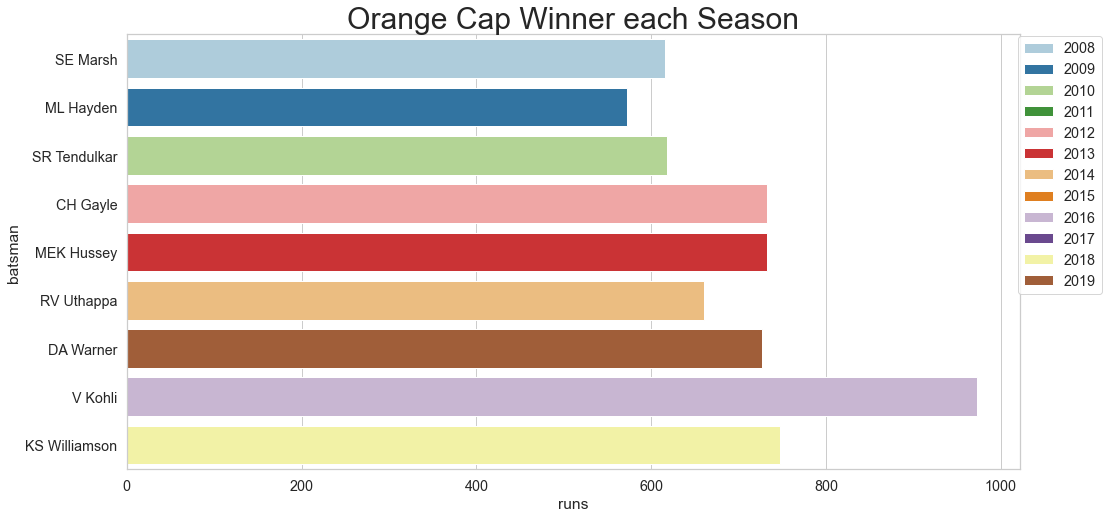

In [81]:
runs=runs_stats.groupby(['season','batsman'])['runs'].sum().sort_values(ascending=False).reset_index()
max_runs=runs.groupby(['season'])['runs'].max().sort_index().reset_index()
orange_cap=pd.merge(runs,max_runs,how='inner',on=['runs','season'])
orange_cap.sort_values(by='season',inplace=True)
orange_cap.reset_index(drop=True,inplace=True)


plt.figure(figsize=(16,8))
sns.set_context('notebook',font_scale=1.3)
sns.set_style('whitegrid')
sns.color_palette("flare", as_cmap=True)
ax=sns.barplot(x='runs',y='batsman',data=orange_cap,hue='season',dodge=False)
ax.set_title('Orange Cap Winner each Season',fontsize=30)
ax.legend(loc='center right', bbox_to_anchor=(1.1,0.7));
plt.show()

Among all the Orange Cap winners Virat Kohli has scored most runs in a season

### Purple Cap Winner for each Season

In [82]:
col='dismissal_kind'
wickets=delivery[(delivery.is_super_over==0)&(delivery[col]!='run out')&(delivery[col]!='obstructing the field')&(delivery[col]!='retired hurt')]

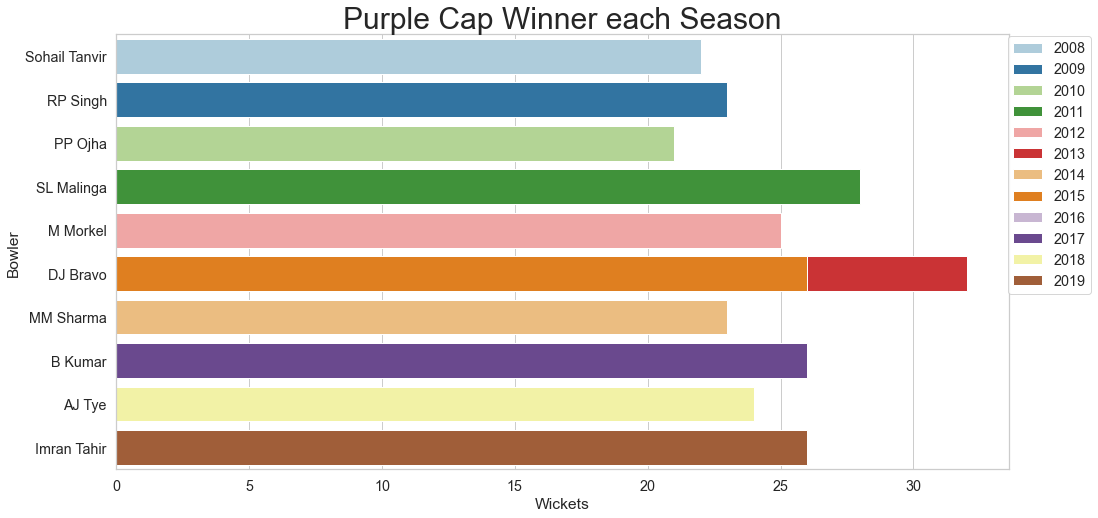

In [83]:
wick_data=wickets.groupby(['match_id','bowler'])['player_dismissed'].count().to_frame().reset_index()
wick_data.columns=['id','Bowler','Wickets']

wick_stats=wick_data.merge(c,on='id',how='inner')

wick=wick_stats.groupby(['season','Bowler'])['Wickets'].sum().sort_values(ascending=False).reset_index()
max_wickets=wick.groupby(['season'])['Wickets'].max().reset_index()
purple_cap=pd.merge(wick,max_wickets,how='inner',on=['Wickets','season'])
purple_cap.sort_values(by='season',ascending=True,inplace=True)
purple_cap.reset_index(drop=True,inplace=True)

plt.figure(figsize=(16,8))
sns.set_context('notebook',font_scale=1.3)
sns.set_style('whitegrid')
sns.color_palette("light:#5A9", as_cmap=True)
ax=sns.barplot(x='Wickets',y='Bowler',data=purple_cap,hue='season',dodge=False)
ax.set_title('Purple Cap Winner each Season',fontsize=30)
ax.legend(loc='center right', bbox_to_anchor=(1.1, 0.7));
plt.show()

Among all the Purple Cap Winners , DJ Bravo has won in two different Seasons.

### Highest Target Set

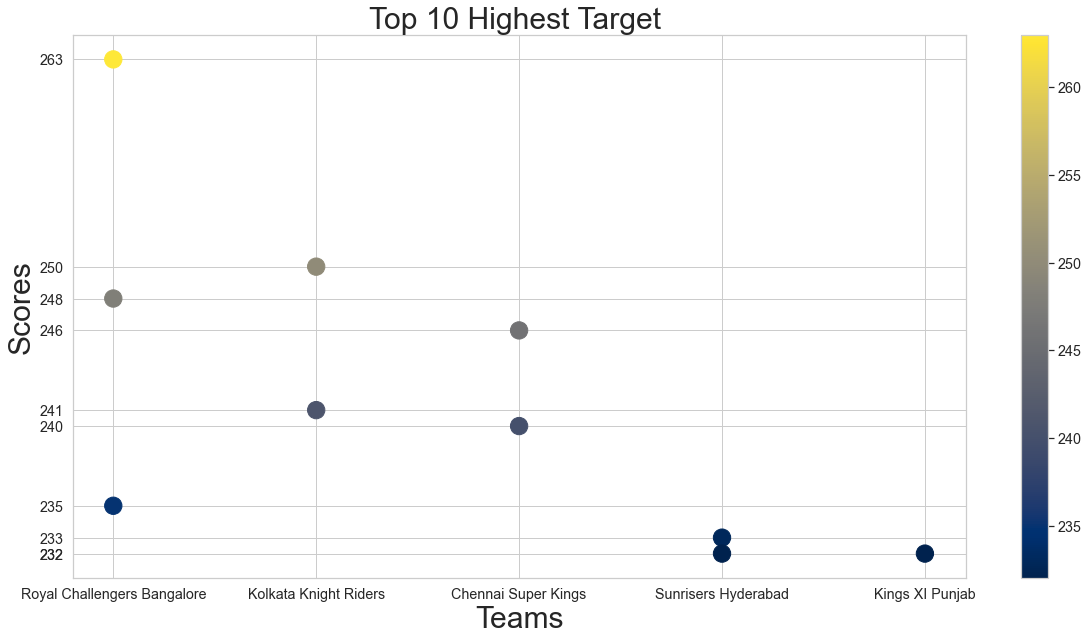

In [84]:
h_targetset=final_data[['BF_Set','Batting_first']].nlargest(n=10,columns='BF_Set').reset_index(drop=True)

plt.figure(figsize=(20,10))

colors=h_targetset['BF_Set']
plt.scatter(x='Batting_first',y='BF_Set',data=h_targetset,c=colors,s=300, cmap='cividis')
plt.yticks(ticks=colors)
plt.xlabel('Teams',fontsize=30)
plt.ylabel('Scores',fontsize=30)
plt.title('Top '+str(len(h_targetset))+' Highest Target ',fontsize=30)
plt.colorbar()
plt.show()

Royal Challengers Banglore  has set the highest target of 263 and they have 3 top scores in Top 10 Highest Target